In [31]:
import pandas as pd
import numpy as np

In [32]:
health = pd.read_csv(r"C:\Users\hi\Desktop\Data Analytics\Data Sets\Old\healthcare_dataset - healthcare_dataset.csv")
health.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,2022-10-09,Penicillin,Abnormal


In [33]:
health.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [34]:
health.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [35]:
health['Date of Admission'] = pd.to_datetime(health['Date of Admission'])
health['Discharge Date'] = pd.to_datetime(health['Discharge Date'])

In [36]:
health['Days Admitted'] = (health['Discharge Date'] - health['Date of Admission']).dt.days

In [37]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                240 non-null    object        
 1   Age                 240 non-null    int64         
 2   Gender              240 non-null    object        
 3   Blood Type          240 non-null    object        
 4   Medical Condition   240 non-null    object        
 5   Date of Admission   240 non-null    datetime64[ns]
 6   Doctor              240 non-null    object        
 7   Hospital            240 non-null    object        
 8   Insurance Provider  240 non-null    object        
 9   Billing Amount      240 non-null    float64       
 10  Room Number         240 non-null    int64         
 11  Admission Type      240 non-null    object        
 12  Discharge Date      240 non-null    datetime64[ns]
 13  Medication          240 non-null    object        

In [38]:
health['Days Admitted'].unique()

array([ 2,  6, 15, 30, 20,  4, 12, 10, 13,  3, 16, 28, 23,  5, 21, 25,  7,
       19, 29, 24, 27,  9, 14, 26, 17, 22,  8, 18,  1, 11])

In [39]:
health['Cost Intensity'] = health['Billing Amount'] / health['Days Admitted']

In [40]:
X = health.drop(columns=['Name','Date of Admission','Hospital','Insurance Provider','Room Number', 'Discharge Date','Test Results'])
y = health['Test Results']

In [41]:
X.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Billing Amount,Admission Type,Medication,Days Admitted,Cost Intensity
0,30,Male,B-,Cancer,Matthew Smith,18856.28131,Urgent,Paracetamol,2,9428.140655
1,62,Male,A+,Obesity,Samantha Davies,33643.32729,Emergency,Ibuprofen,6,5607.221215
2,76,Female,A-,Obesity,Tiffany Mitchell,27955.09608,Emergency,Aspirin,15,1863.673072
3,28,Female,O+,Diabetes,Kevin Wells,37909.78241,Elective,Ibuprofen,30,1263.659414
4,43,Female,AB+,Cancer,Kathleen Hanna,14238.31781,Urgent,Penicillin,20,711.915891


In [42]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                240 non-null    int64  
 1   Gender             240 non-null    object 
 2   Blood Type         240 non-null    object 
 3   Medical Condition  240 non-null    object 
 4   Doctor             240 non-null    object 
 5   Billing Amount     240 non-null    float64
 6   Admission Type     240 non-null    object 
 7   Medication         240 non-null    object 
 8   Days Admitted      240 non-null    int64  
 9   Cost Intensity     240 non-null    float64
dtypes: float64(2), int64(2), object(6)
memory usage: 18.9+ KB


In [44]:
# selecting categorical and numeric values
numeric_values = X.select_dtypes('int64','float64').columns.tolist()
categoric_values = X.select_dtypes('object').columns.tolist()

In [45]:
#scalling numeric values
numeric_scalling = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scalling', StandardScaler())
    ]
)

In [46]:
# encoding categorical values
categoric_encoding = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant', missing_values='missing' )),
        ('encode', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [47]:
# preprocessing the data for modelling
preprocessing = ColumnTransformer(
    transformers=[
        ('numeric', numeric_scalling, numeric_values),
        ('categoric', categoric_encoding, categoric_values)
    ]
)

In [48]:
#model pipeline
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessing ),
        ('ensembling', RandomForestClassifier())
    ]
)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
# #encoding y column
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)

In [55]:
#training the model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Days Admitted']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values='missing',
                                                                                 strategy='constant')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Blood Type',
                                                   'Medical Condition',
                                                   'Doctor', 'Admission Type',
                                                   'Medication'])])),
                ('ensembling', RandomForestClassifier())])

In [60]:
#model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#accuracy score evaluation
y_pred = model_pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.25


In [61]:
print(confusion_matrix(y_test, y_pred))

[[7 6 4]
 [9 3 4]
 [8 5 2]]


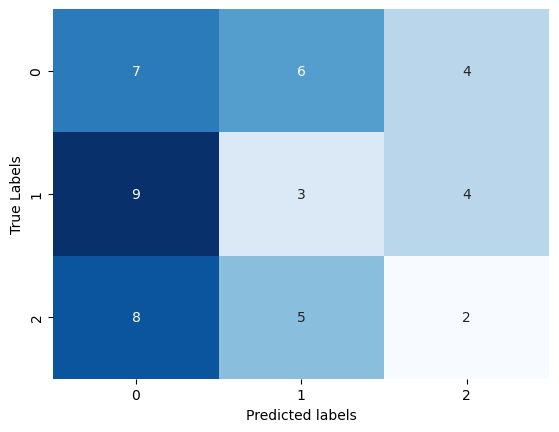

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,  )
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')
plt.show()